In [2]:

import requests
import json
from datetime import date
import matplotlib.pyplot as plt


def get_data():
    # With requests, we can ask the web service for the data.
    # Can you understand the parameters we are passing here?
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    text = response.text
    return json.loads(text)

def get_year(earthquake):
    """Extract the year in which an earthquake happened."""
    timestamp = earthquake['properties']['time']
    # The time is given in a strange-looking but commonly-used format.
    # To understand it, we can look at the documentation of the source data:
    # https://earthquake.usgs.gov/data/comcat/index.php#time
    # Fortunately, Python provides a way of interpreting this timestamp:
    # (Question for discussion: Why do we divide by 1000?)
    year = date.fromtimestamp(timestamp/1000).year
    return year


def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    ...


# This is function you may want to create to break down the computations,
# although it is not necessary. You may also change it to something different.
def get_magnitudes_per_year(earthquakes):
    """Retrieve the magnitudes of all the earthquakes in a given year.
    
    Returns a dictionary with years as keys, and lists of magnitudes as values.
    """
    ...


def plot_average_magnitude_per_year(earthquakes):
    ...


def plot_number_per_year(earthquakes):
    ...



# Get the data we will work with
quakes = get_data()['features']

# Plot the results - this is not perfect since the x axis is shown as real
# numbers rather than integers, which is what we would prefer!
plot_number_per_year(quakes)
plt.clf()  # This clears the figure, so that we don't overlay the two plots
plot_average_magnitude_per_year(quakes)

<Figure size 640x480 with 0 Axes>

In [11]:
import pandas as pd

df = pd.DataFrame(quakes) 
df

,type,properties,geometry,id
0,Feature,"{'mag': 2.6, 'place': '12 km NNW of Penrith, U...","{'type': 'Point', 'coordinates': [-2.81, 54.77...",usp0009rst
1,Feature,"{'mag': 4, 'place': '1 km WSW of Warwick, Unit...","{'type': 'Point', 'coordinates': [-1.61, 52.28...",usp000a0pm
2,Feature,"{'mag': 4, 'place': '38 km NNE of Cromer, Unit...","{'type': 'Point', 'coordinates': [1.564, 53.23...",usp000a6hd
3,Feature,"{'mag': 3.3, 'place': '171 km ENE of Peterhead...","{'type': 'Point', 'coordinates': [0.872, 58.09...",usp000abdr
4,Feature,"{'mag': 2.9, 'place': '8 km W of Marlborough, ...","{'type': 'Point', 'coordinates': [-1.845, 51.4...",usp000abnc
...,...,...,...,...
115,Feature,"{'mag': 4.1, 'place': '7 km NNE of Withernsea,...","{'type': 'Point', 'coordinates': [0.0603, 53.7...",us1000emw5
116,Feature,"{'mag': 2.6, 'place': '5 km W of Capel, United...","{'type': 'Point', 'coordinates': [-0.258, 51.1...",us2000fpl7
117,Feature,"{'mag': 2.4, 'place': '4 km E of Capel, United...","{'type': 'Point', 'coordinates': [-0.265, 51.1...",us2000ft87
118,Feature,"{'mag': 2.8, 'place': '1 km S of Ewhurst, Unit...","{'type': 'Point', 'coordinates': [-0.4435, 51....",us2000fxc7


In [38]:
magnitudes = []
for i in range(len(df)):
    magnitudes.append(df['properties'][i]['mag'])

In [40]:
import numpy as np
magnitudes = np.array(magnitudes)


In [24]:
year = []
for i in range(len(df)):
    year.append(df['properties'][i]['time'])

In [41]:
year_array = np.array(year)
year_array = np.array([date.fromtimestamp(ts / 1000).year for ts in year_array])

In [43]:
new_df = pd.DataFrame({'year': year_array, 'mag': magnitudes})

In [82]:
mean = new_df.groupby(['year']).mean()
mean.loc[2012] = 0
mean.loc[2016] = 0

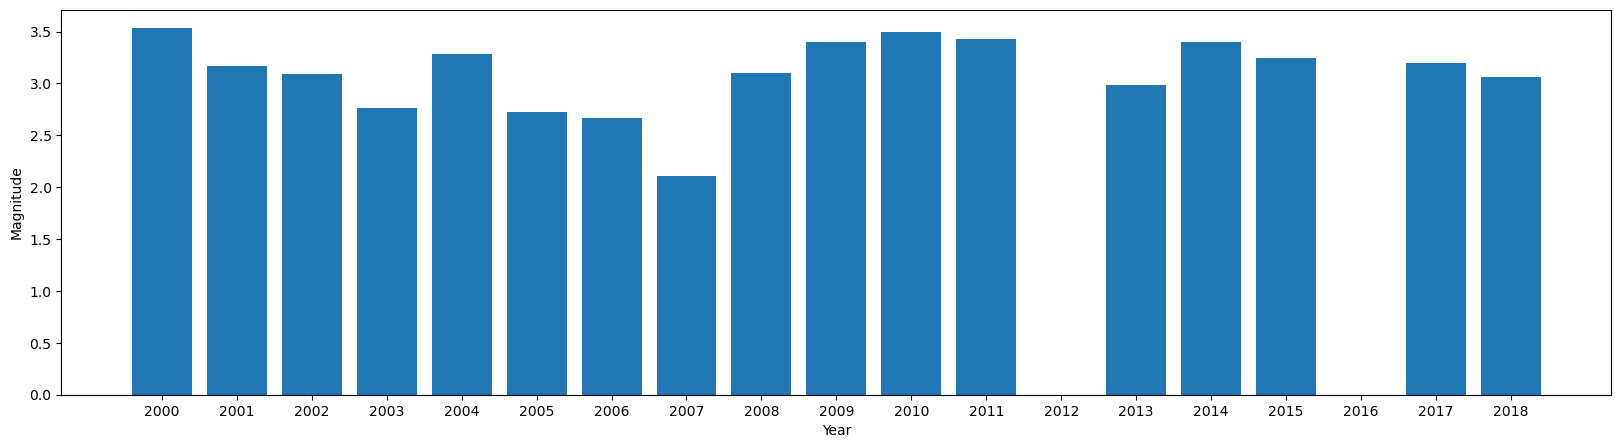

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(list(mean.index), mean['mag'])
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.xticks(ticks=list(mean.index), labels=[int(year) for year in mean.index])
plt.show()

In [84]:
count = new_df.groupby(['year']).count()
count.loc[2012] = 0
count.loc[2016] = 0

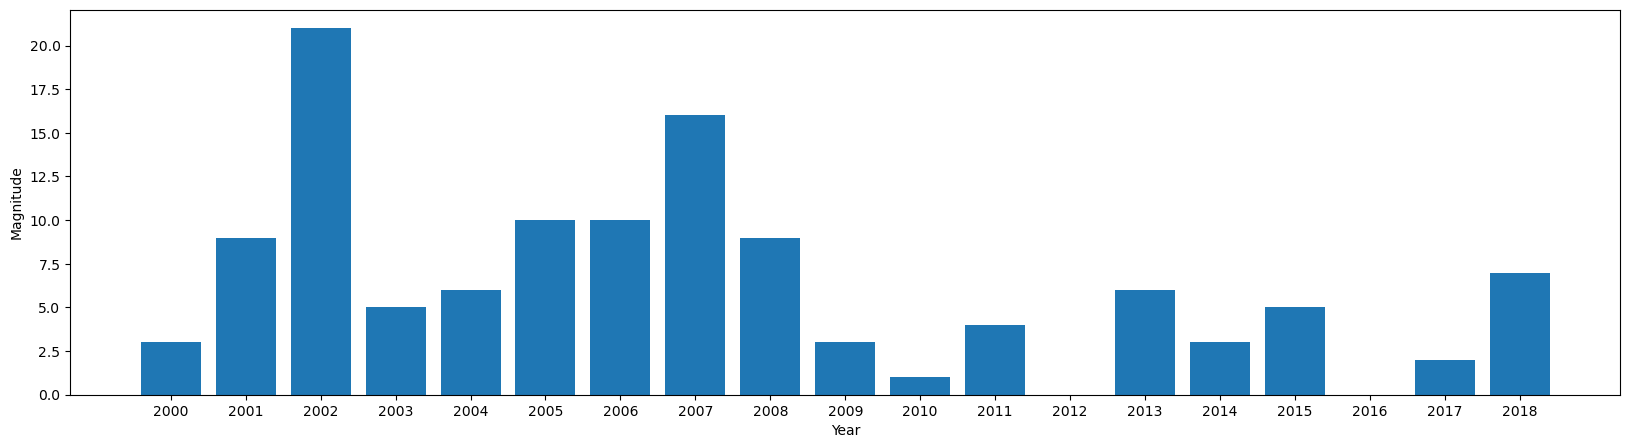

In [85]:
plt.figure(figsize=(20,5))
plt.bar(list(count.index), count['mag'])
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.xticks(ticks=list(mean.index), labels=[int(year) for year in mean.index])
plt.show()